In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import numpy as np

      death_per_100000
year                  
2000               495
2001               503
2002               494
2003               480
2004               445
2005               422
2006               395
2007               381
2008               372
2009               346
2010               336
2011               309
2012               305
2013               298
2014               284
2015               290
2016               276
2017               272
2018               266
2019               254
2020               259


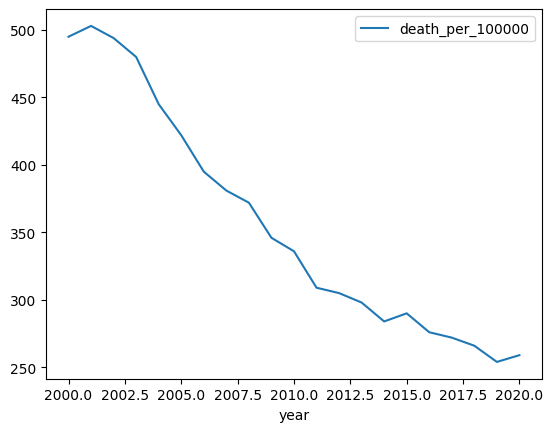

In [3]:
df = pd.read_csv('health.csv')
df.columns=["year","death_per_100000"]

df.set_index('year', inplace=True)
df.plot()
print(df)

In [4]:
def adfuller_test(ppm):
    result = adfuller(ppm)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value, label in zip(result,labels):
        print(f'{label}: {value}' )

    print('Stationary' if result[1] <= 0.05 else 'Non-stationary')

adfuller_test(df['death_per_100000'])

ADF Test Statistic: -3.2438882978060337
p-value: 0.01758071670820682
#Lags Used: 4
Number of Observations: 16
Stationary


In [5]:
df['First Difference'] = df['death_per_100000'] - df['death_per_100000'].shift(1)
df['Seasonal First Difference']=df['death_per_100000']-df['death_per_100000'].shift(12)
df

,death_per_100000,First Difference,Seasonal First Difference
year,,,
2000,495,NaN,NaN
2001,503,8.0,NaN
2002,494,-9.0,NaN
2003,480,-14.0,NaN
2004,445,-35.0,NaN
2005,422,-23.0,NaN
2006,395,-27.0,NaN
2007,381,-14.0,NaN
2008,372,-9.0,NaN


In [6]:
adfuller_test(df['Seasonal First Difference'].diff().dropna())

ADF Test Statistic: -2.4144170272499643
p-value: 0.13770858594062685
#Lags Used: 0
Number of Observations: 7
Non-stationary


<AxesSubplot:xlabel='year'>

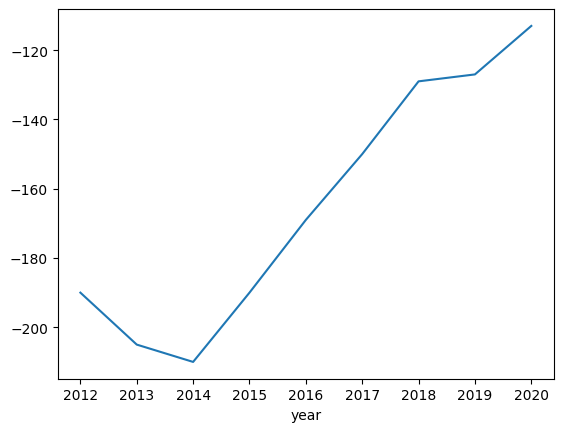

In [7]:
df['Seasonal First Difference'].plot()

C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


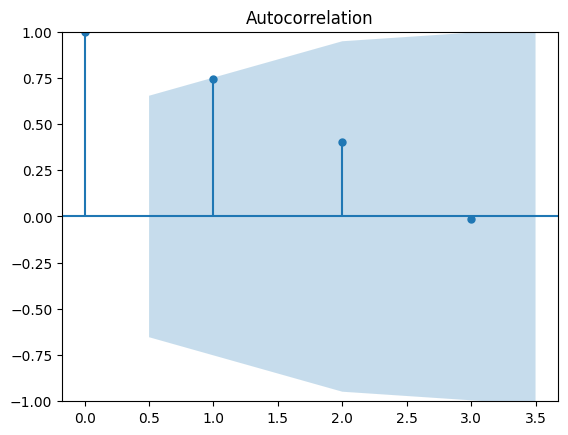

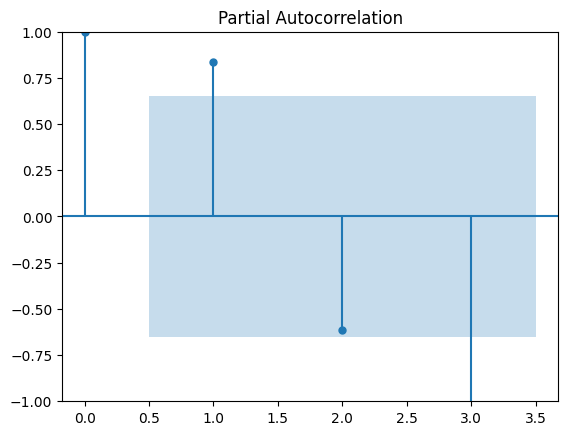

In [8]:
plot_acf(df['Seasonal First Difference'].dropna(), lags=3)
plot_pacf(df['Seasonal First Difference'].dropna(), lags=3)
plt.show()

In [9]:
model = ARIMA(df['death_per_100000'], order=(1,2,1))
model_fit = model.fit()
future_health = list(map(lambda x: round(x), list(model_fit.forecast(steps=14).values)))
print(future_health)


[254, 254, 252, 251, 249, 247, 246, 244, 243, 241, 240, 238, 236, 235]


C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\loca